<a href="https://colab.research.google.com/github/abbeymars/AbigailMarsella-AER850Project3/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 15.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Masked image saved to: /content/drive/My Drive/AER850Proj3/masked_motherboard.jpg


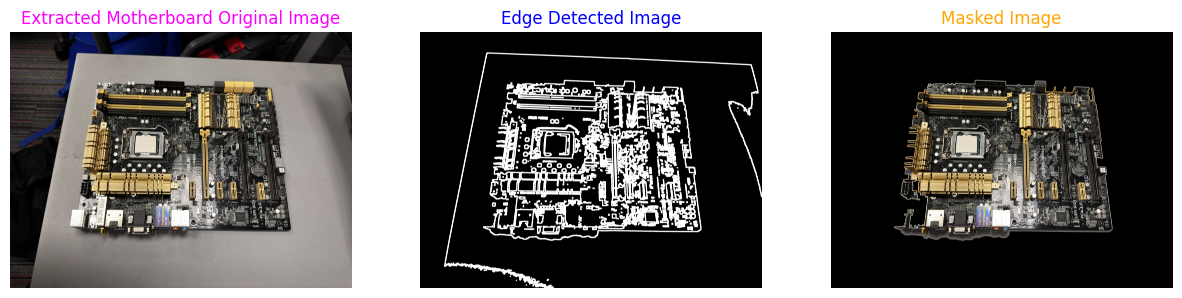

<Figure size 640x480 with 0 Axes>

100%|██████████| 6.25M/6.25M [00:00<00:00, 71.0MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/AER850Proj3/YOLO_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=900, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/My Drive/AER850Proj3/YOLO_training_results, name=YOLO_Training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

RuntimeError: Dataset '/content/drive/My Drive/AER850Proj3/YOLO_dataset.yaml' error ❌ '/content/drive/My Drive/AER850Proj3/YOLO_dataset.yaml' does not exist

In [17]:
!pip install ultralytics
from google.colab import files
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO


#Step 1: Object Masking
drive.mount('/content/drive') #mount google drive
#Step 1.1 Upload Image/Define Path
image_path = "/content/drive/My Drive/AER850Proj3/motherboard_image.JPEG"
image_real = cv2.imread(image_path)
image = cv2.rotate(image_real, cv2.ROTATE_90_CLOCKWISE)
#convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#reduce noise
image_blur = cv2.GaussianBlur(gray_image, (47, 47), 4)
#Thresholding
_, threshold_image = cv2.threshold(image_blur, 100, 255, cv2.THRESH_BINARY)
#Edge Detection, Canny Method
edge_detection = cv2.Canny(threshold_image, 100, 200)
edge_detection = cv2.dilate(edge_detection, None, iterations=10)
#Contour Detection
contour_detection, _ = cv2.findContours(edge_detection, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#Filter and highlight the largest contour
largest_contour = max(contour_detection, key=cv2.contourArea)
mask = np.zeros_like(image)
cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), thickness=cv2.FILLED)
#Isolate the motherboard
masked_image = cv2.bitwise_and(image, mask)
#Save this result
output_path = "/content/drive/My Drive/AER850Proj3/masked_motherboard.jpg"
cv2.imwrite(output_path, masked_image)
print(f"Masked image saved to: {output_path}")

plt.figure(figsize=(15, 5))
#Visualizing Original Image
plt.subplot(1, 3, 1)
plt.title("Extracted Motherboard Original Image", color='magenta')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
#Visualizing Edge Detected Image
plt.subplot(1, 3, 2)
plt.title("Edge Detected Image", color='blue')
plt.imshow(edge_detection, cmap='gray')
plt.axis("off")
#Visualizing Masked Image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title("Masked Image", color='orange')
plt.axis("off")
plt.show()

plt.tight_layout()
plt.show()


#Step 2: YOLOv8 Training
#Define the dataset path and parameters
data_path = "/content/drive/My Drive/AER850Proj3/data/data.yaml"
model_name = "yolov8n"
output_directory = "/content/drive/My Drive/AER850Proj3/YOLO_training_results"
#Define model
model = YOLO(f"{model_name}.pt")
#Train the model
model.train(
    data=data_path,
    epochs=100,
    batch=16,
    imgsz=900,
    name="YOLO_Training",
    project=output_directory
)
